In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

In [2]:
MainData = pd.read_csv('train.csv')
MainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h1>Problem 1a)<h1>

In [3]:
air = pd.DataFrame(MainData['CentralAir'])  # Response
price = pd.DataFrame(MainData['SalePrice'])      # Predictor
train_air,test_air,train_price,test_price= train_test_split(air,price,test_size=0.25,random_state=42)
print("Train Set:",train_air.shape,train_price.shape)
print("Train Set:",test_air.shape,test_price.shape)

Train Set: (1095, 1) (1095, 1)
Train Set: (365, 1) (365, 1)


<Axes: xlabel='SalePrice', ylabel='CentralAir'>

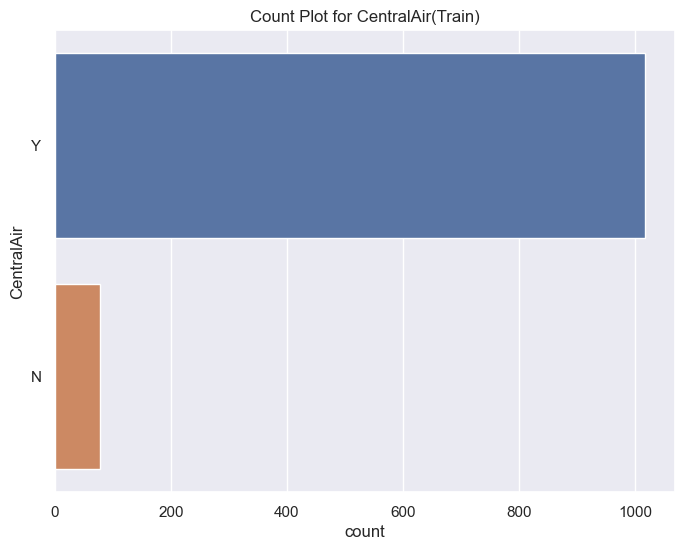

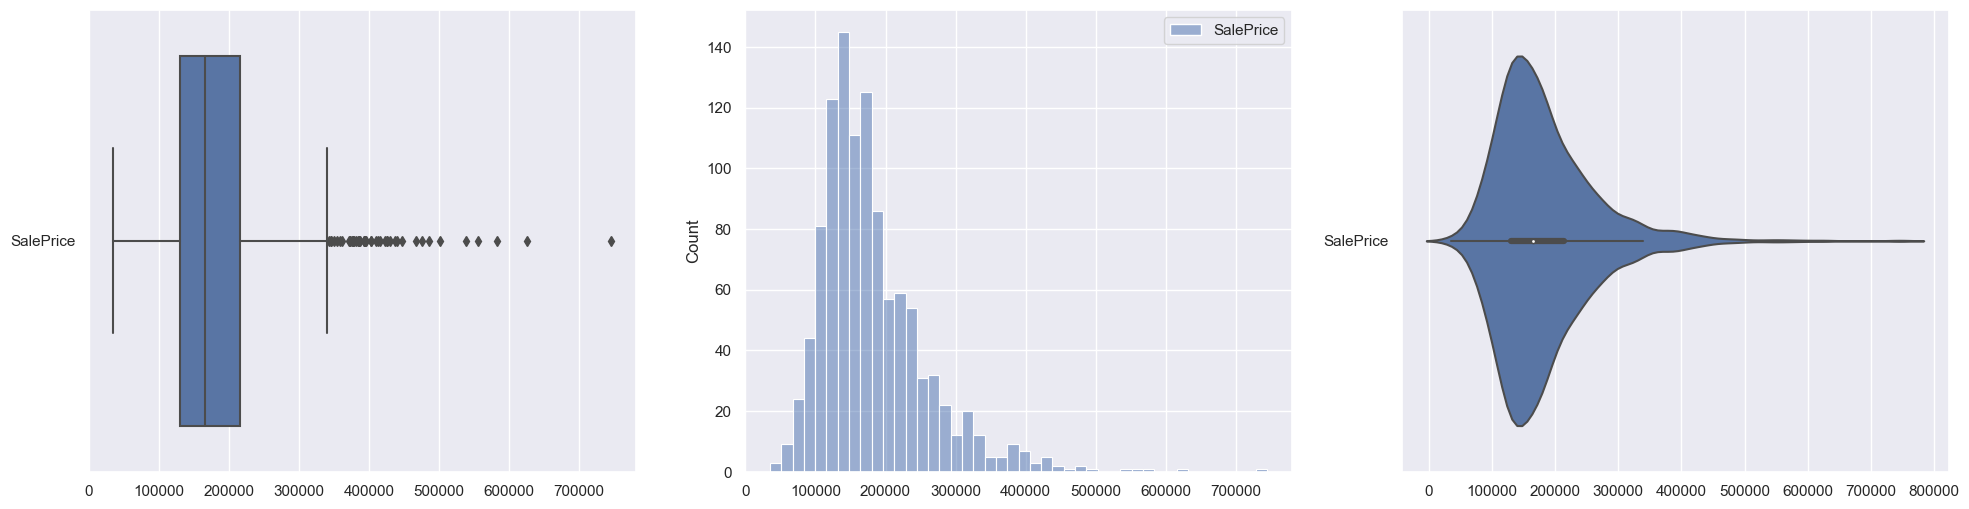

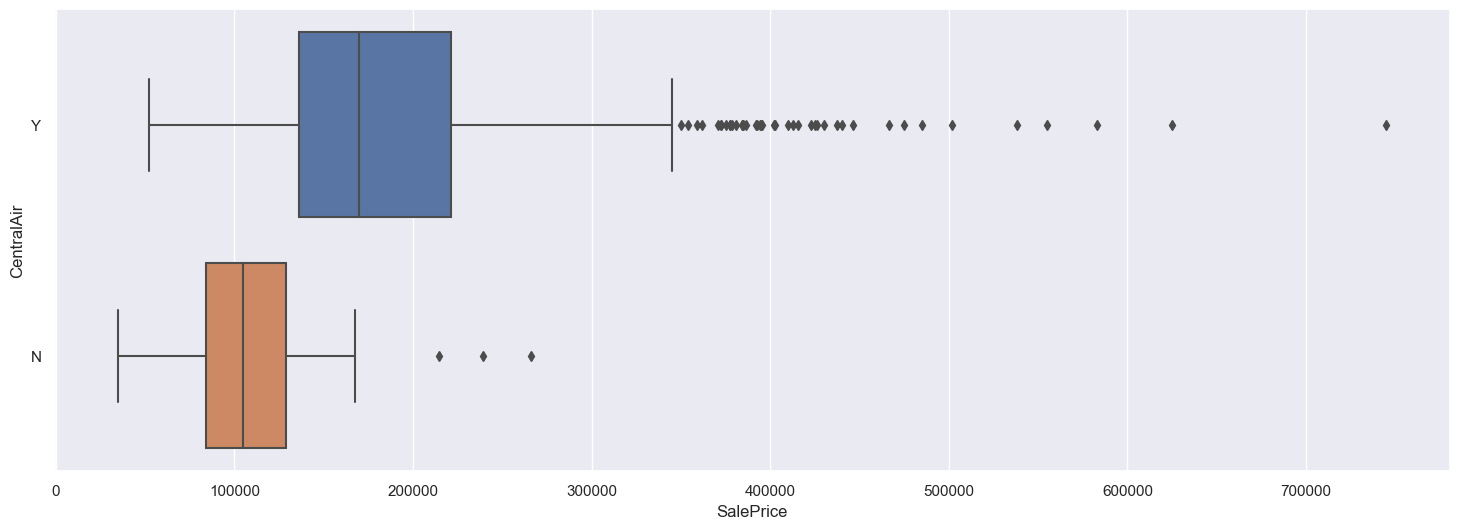

In [4]:
plt.figure(figsize=(8, 6))
sb.countplot(y="CentralAir", data=train_air)
plt.title('Count Plot for CentralAir(Train)')
# Plot the distributions of Total Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = train_price, orient = "h", ax = axes[0])
sb.histplot(data = train_price, ax = axes[1])
sb.violinplot(data = train_price, orient = "h", ax = axes[2])
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([train_price, train_air], axis = 1).reindex(train_price.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")

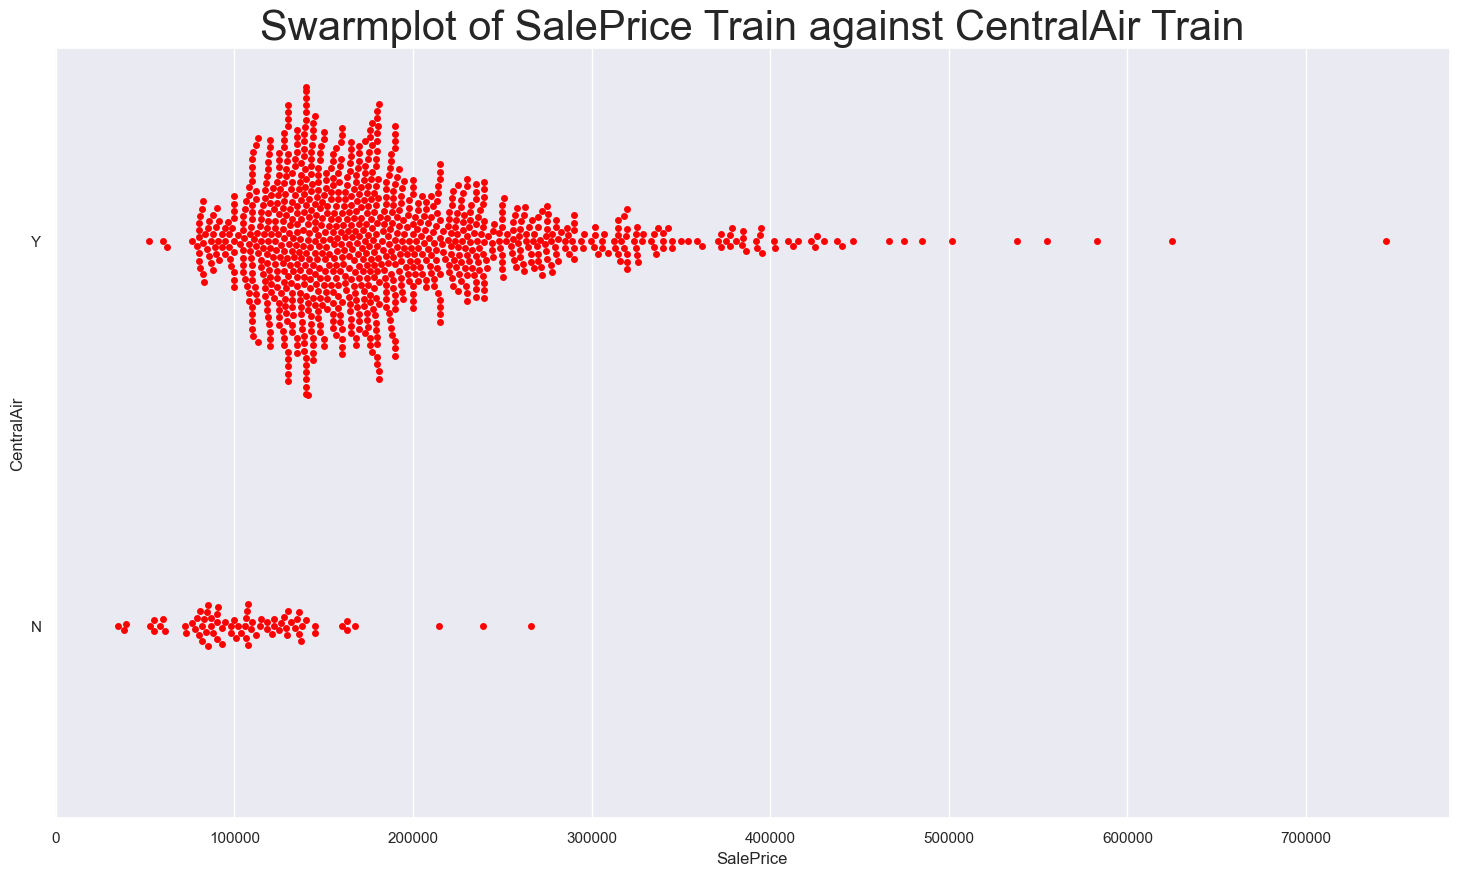

In [5]:
# Swarmplot 
f = plt.figure(figsize=(18, 10))  
sb.swarmplot(x="SalePrice", y="CentralAir", data=trainDF, orient="h", color="red")  
plt.title('Swarmplot of SalePrice Train against CentralAir Train', fontsize=30)

plt.show()

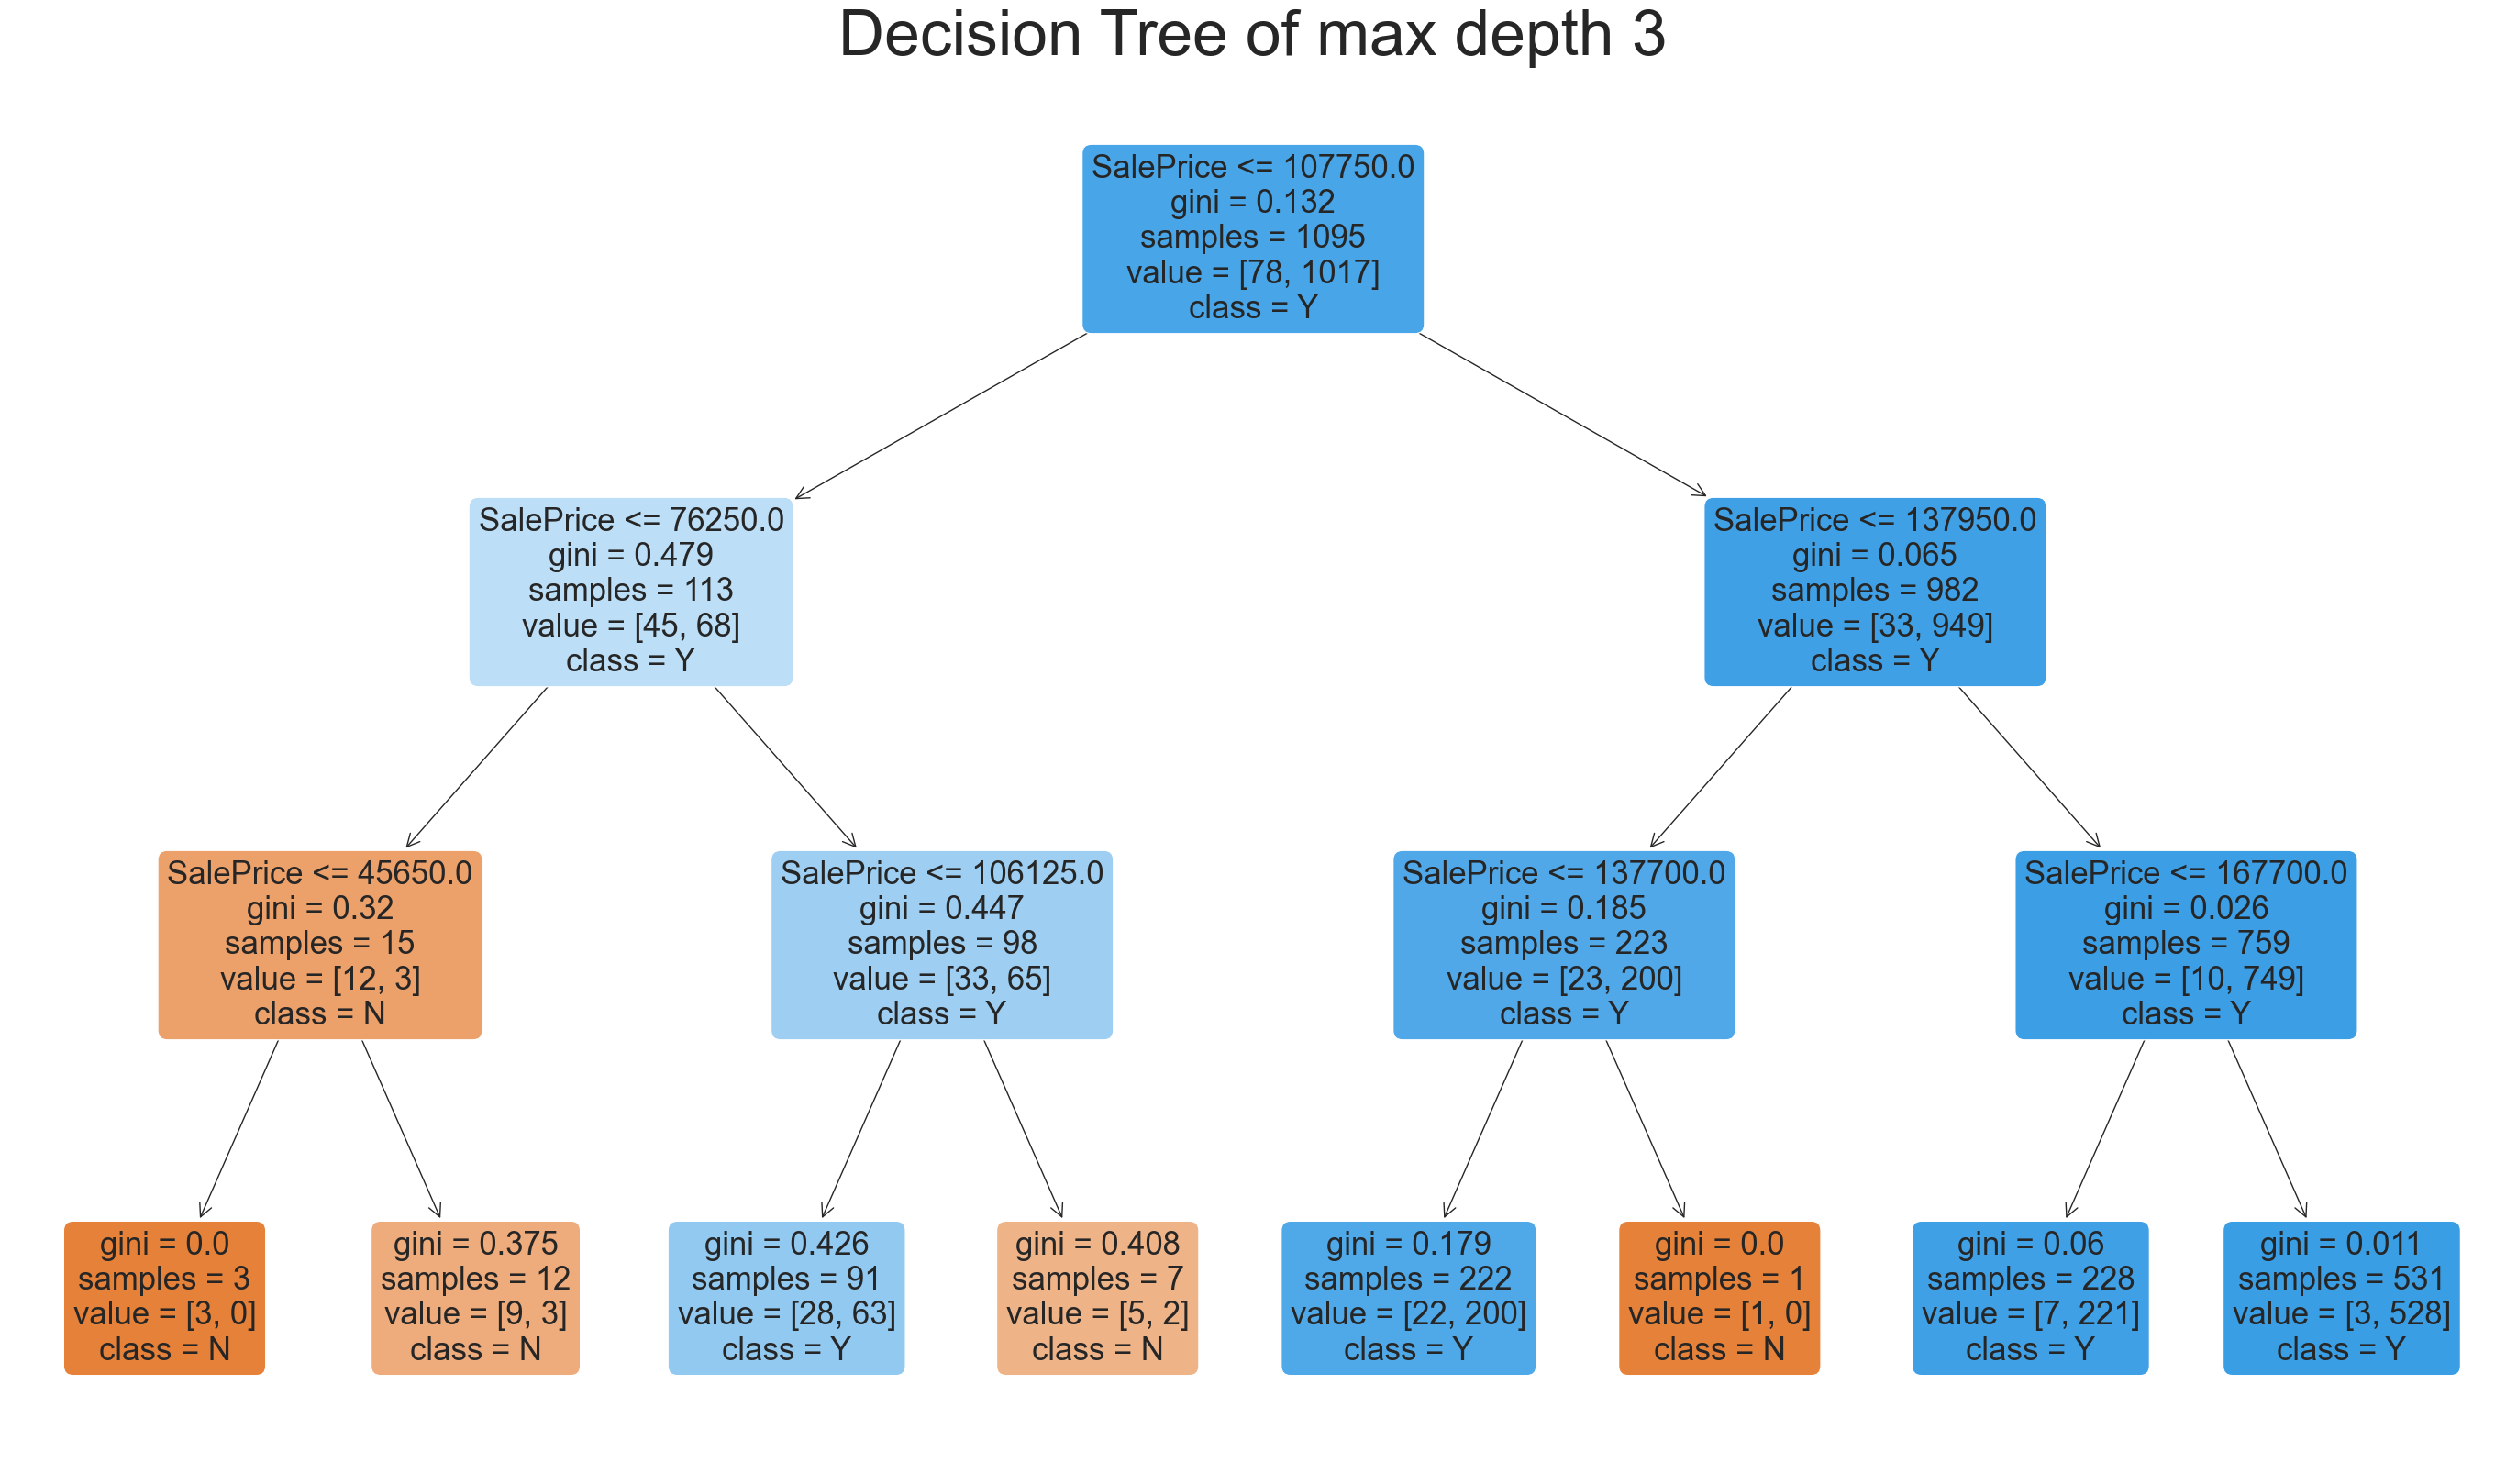

In [6]:
# Decision Tree of max depth 3, Train Data
dectree3 = DecisionTreeClassifier(max_depth=3) 
dectree3.fit(train_price, train_air)                  

# Plot the trained Decision Tree of max depth 3 with larger node sizes
plt.figure(figsize=(35, 20))  
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"],
          fontsize=25)  
plt.title("Decision Tree of max depth 3", fontsize=50)
plt.show()



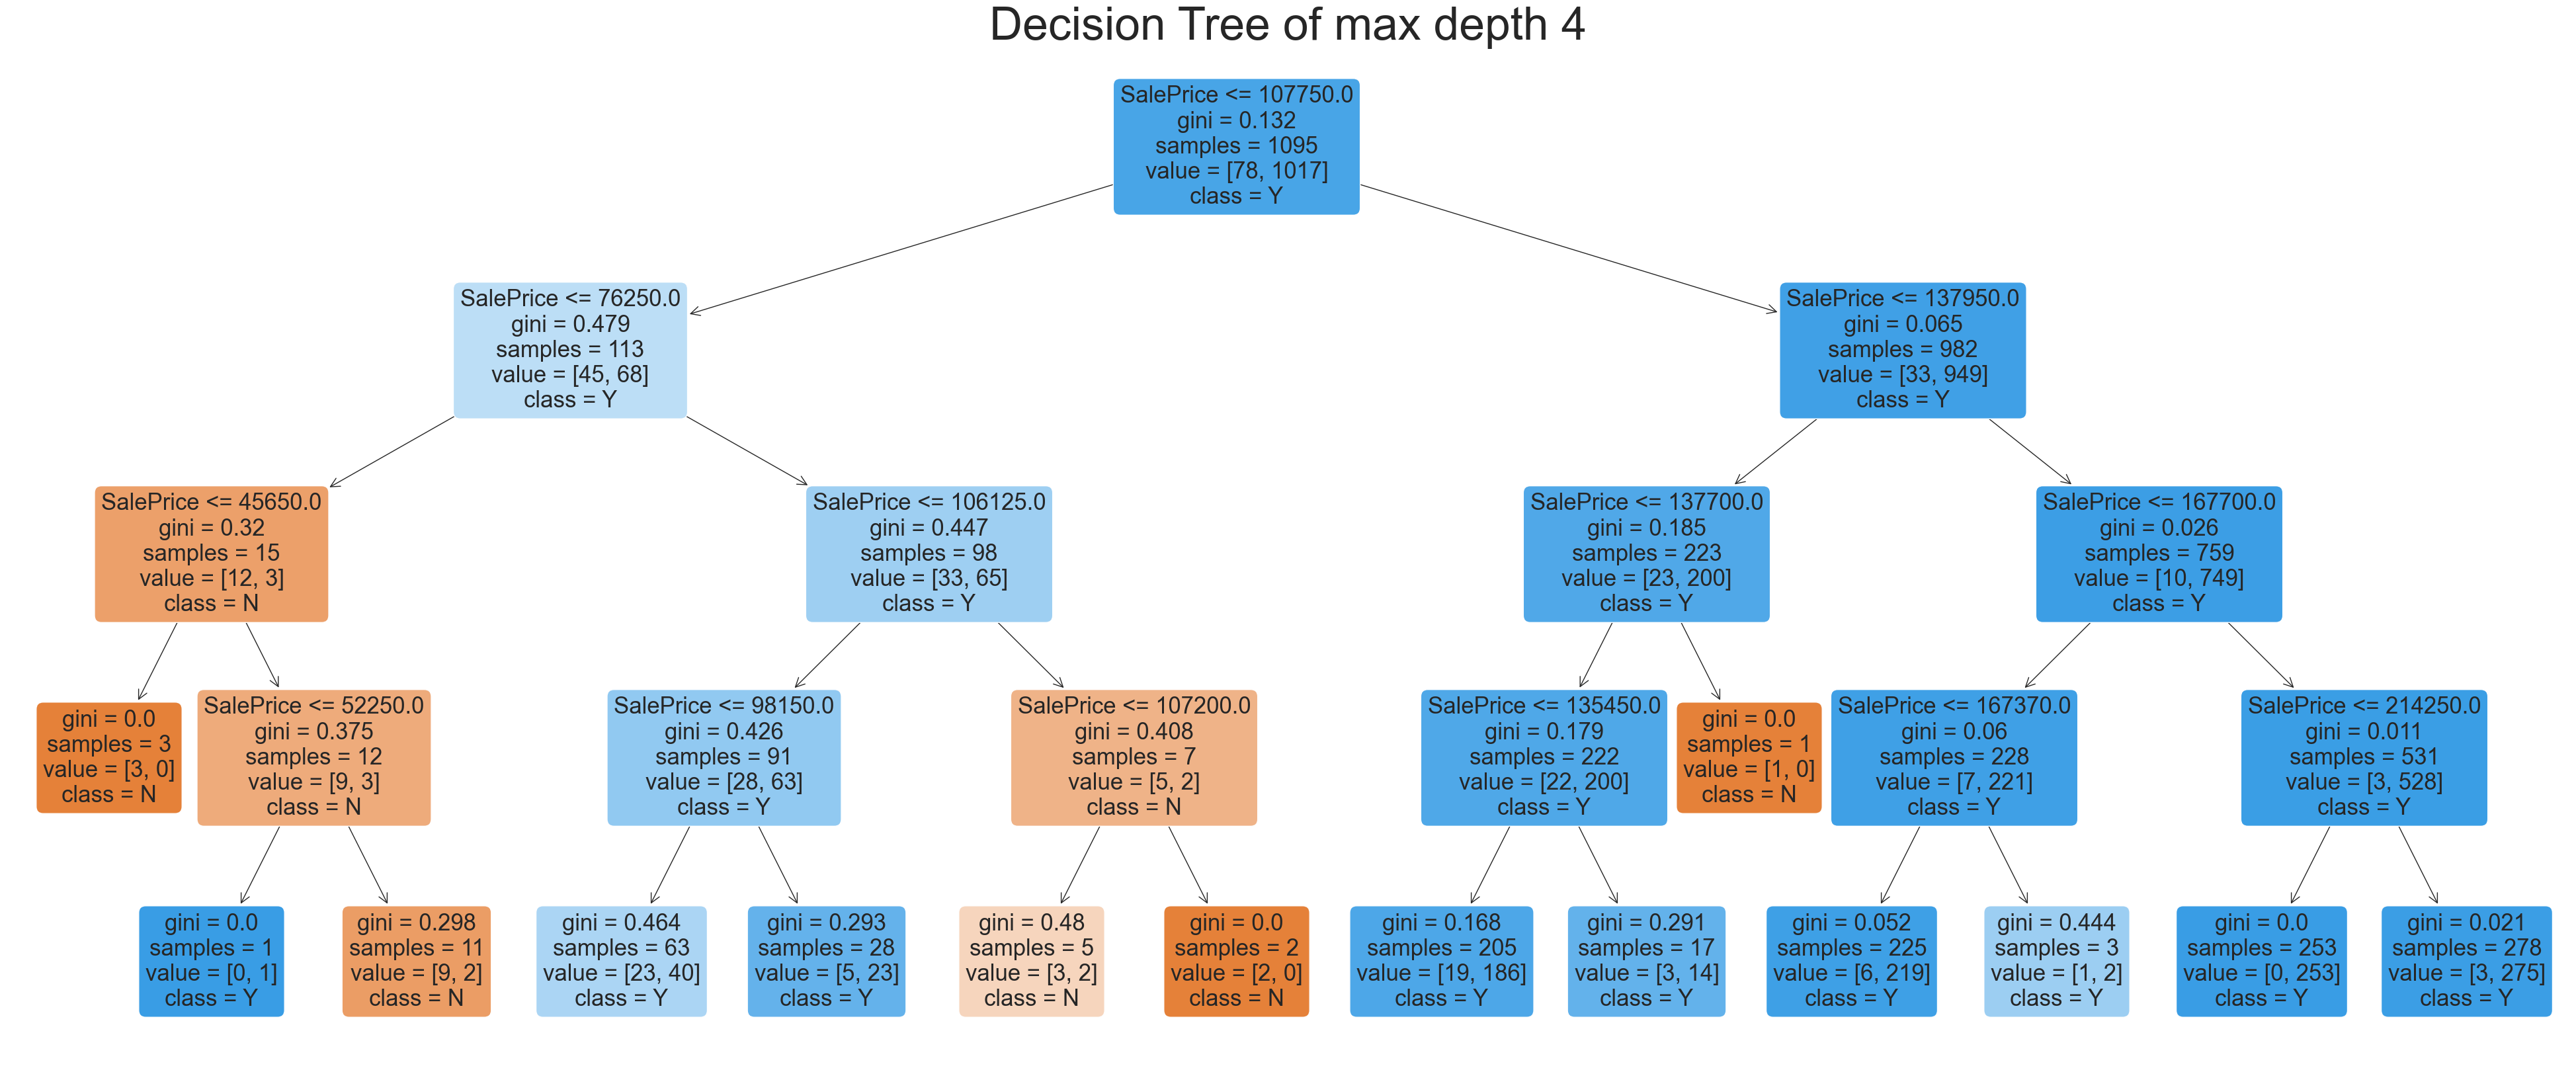

In [7]:
# Decision Tree of max depth 4 using Train Data
dectree4 = DecisionTreeClassifier(max_depth=4)  
dectree4.fit(train_price, train_air)                  


plt.figure(figsize=(50, 20))  
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"],
          fontsize=25)  
plt.title("Decision Tree of max depth 4", fontsize=50)
plt.show()

<h2>Problem 1a) solutions:<h2>
    <h3>As you can see above are the tree in the cases of of max
depth 3 and max depth 4<h3>

<h1>Problem 1b)<h1>

Classification Accuracy 	: 0.9452054794520548

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9406392694063926

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9452054794520548

Test:
True positive Rate= 0.9741379310344828
False positive Rate= 0.6470588235294118

Train:
True positive Rate= 0.9950835791543756
False positive Rate= 0.7692307692307693


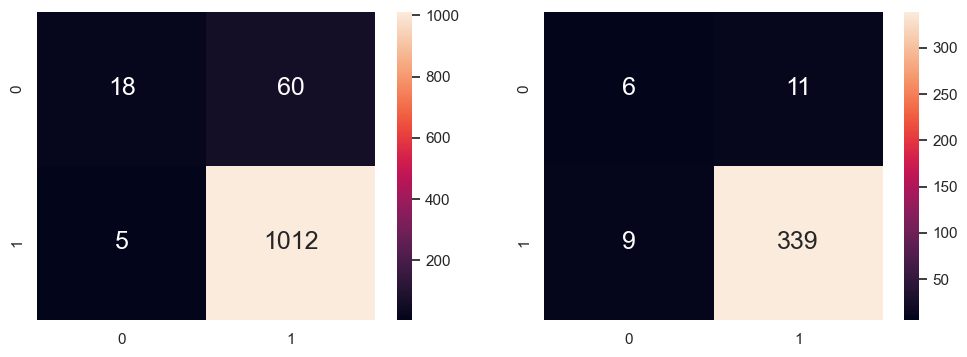

In [19]:
# Predict Legendary corresponding to Total Train
air_train_pred = dectree3.predict(train_price)
#air_test_pred = dectree3.predict(test_price)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(train_air, air_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},  ax = axes[0])
sb.heatmap(confusion_matrix(test_air, air_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},  ax = axes[1])
matrix=confusion_matrix(train_air, air_train_pred)



# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree3.score(test_price, test_air))
print()

# train data
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree3.score(train_price, train_air))
print()

# test data
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree3.score(test_price, test_air))
print()



matrix_test=confusion_matrix(test_air, air_test_pred)
print("Test:")
print("True positive Rate=",matrix_test[1][1]/(matrix_test[1][0]+matrix_test[1][1]))
print("False positive Rate=",matrix_test[0][1]/(matrix_test[0][0]+matrix_test[0][1]))
print()
matrix=confusion_matrix(train_air, air_train_pred)
print("Train:")
print("True positive Rate=",matrix[1][1]/(matrix[1][0]+matrix[1][1]))
print("False positive Rate=",matrix[0][1]/(matrix[0][0]+matrix[0][1]))


Classification Accuracy 	: 0.9452054794520548

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9415525114155251

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9452054794520548

Test:
True positive Rate= 0.9741379310344828
False positive Rate= 0.6470588235294118

Train:
True positive Rate= 0.9960668633235005
False positive Rate= 0.7692307692307693


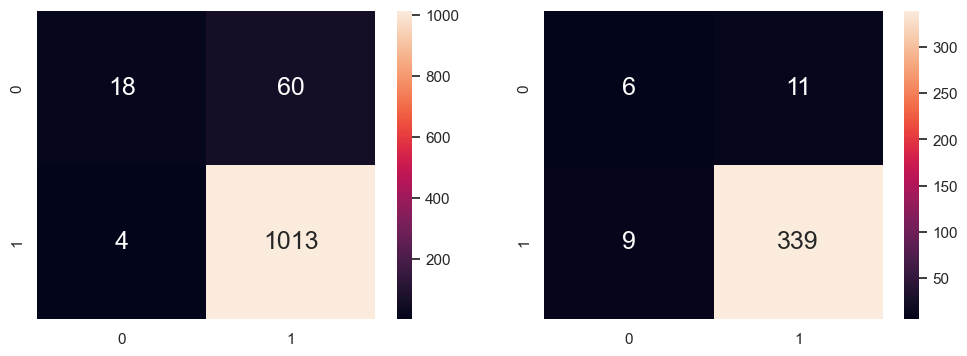

In [20]:
# Predict Legendary corresponding to Total Train
air_train_pred = dectree4.predict(train_price)
#air_test_pred = dectree4.predict(test_price)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(train_air, air_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(test_air, air_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])



# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree4.score(test_price, test_air))
print()

# train data
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree4.score(train_price, train_air))
print()

# test data
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree4.score(test_price, test_air))
print()

matrix_test=confusion_matrix(test_air, air_test_pred)
print("Test:")
print("True positive Rate=",matrix_test[1][1]/(matrix_test[1][0]+matrix_test[1][1]))
print("False positive Rate=",matrix_test[0][1]/(matrix_test[0][0]+matrix_test[0][1]))
print()
matrix=confusion_matrix(train_air, air_train_pred)
print("Train:")
print("True positive Rate=",matrix[1][1]/(matrix[1][0]+matrix[1][1]))
print("False positive Rate=",matrix[0][1]/(matrix[0][0]+matrix[0][1]))


<h2>Problem 1b) solutions:<h2>
    

<h3>Both the test data have the same classification accuracy, true positive and false positive rate. There could be overfitting on depth 4, as it performs just as well as depth 3, but drops more on the true positive rate on the train data vs test data compared to depth 3. So depth 3 is better<h3>

<h1>Problem 2)<h1>

In [164]:
air = pd.DataFrame(MainData['CentralAir'])  # Response
qual = pd.DataFrame(MainData['OverallQual'])      # Predictor
train_air,test_air,train_qual,test_qual= train_test_split(air,qual,test_size=0.25)
print("Train Set:",train_air.shape,train_qual.shape)
print("Train Set:",test_air.shape,test_qual.shape)

Train Set: (1095, 1) (1095, 1)
Train Set: (365, 1) (365, 1)


Classification Accuracy 	: 0.9461187214611873
Classification Accuracy 	: 0.9205479452054794

Train:
True positive Rate= 0.995136186770428
False positive Rate= 0.8059701492537313

Test:
True positive Rate= 0.9881305637982196
False positive Rate= 0.8928571428571429


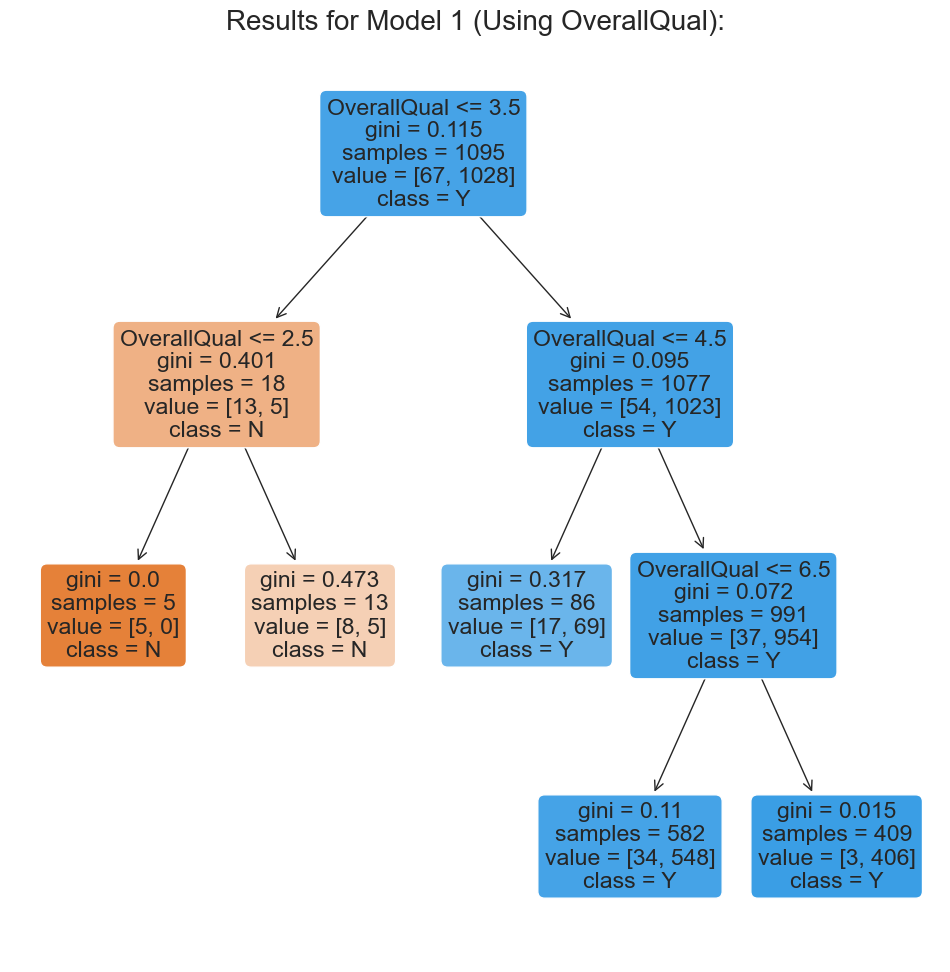

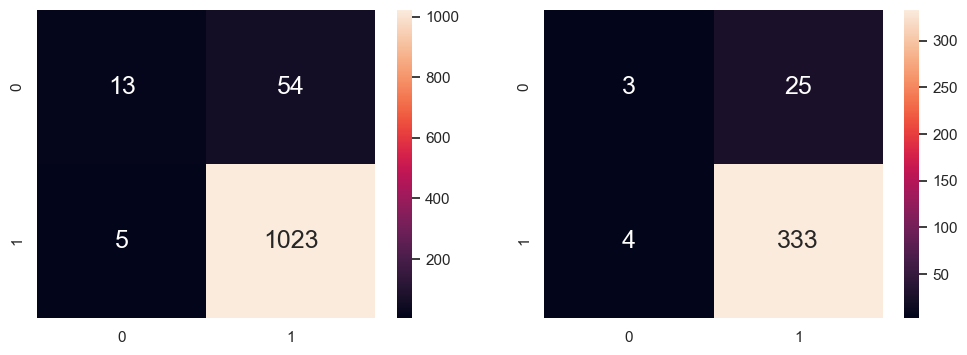

In [165]:
dectree3 = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree3.fit(train_qual, train_air)

f = plt.figure(figsize=(12,12))
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=["OverallQual"], 
          class_names=["N","Y"])

# Predict Legendary corresponding to Total Train
air_train_pred = dectree3.predict(train_qual)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree3.score(train_qual, train_air))

# Predict Legendary corresponding to Total Train
air_test_pred = dectree3.predict(test_qual)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree3.score(test_qual, test_air))
print()

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.title("Results for Model 1 (Using OverallQual):", fontsize=20)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(train_air, air_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(test_air, air_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

print("Train:")
matrix=confusion_matrix(train_air, air_train_pred)
print("True positive Rate=",matrix[1][1]/(matrix[1][0]+matrix[1][1]))
print("False positive Rate=",matrix[0][1]/(matrix[0][0]+matrix[0][1]))
print()
print("Test:")
matrix_test=confusion_matrix(test_air, air_test_pred)
print("True positive Rate=",matrix_test[1][1]/(matrix_test[1][0]+matrix_test[1][1]))
print("False positive Rate=",matrix_test[0][1]/(matrix_test[0][0]+matrix_test[0][1]))

In [166]:
air = pd.DataFrame(MainData['CentralAir'])  # Response
year = pd.DataFrame(MainData['YearBuilt'])      # Predictor
train_air,test_air,train_year,test_year= train_test_split(air,year,test_size=0.25)
print("Train Set:",train_air.shape,train_year.shape)
print("Train Set:",test_air.shape,test_year.shape)

Train Set: (1095, 1) (1095, 1)
Train Set: (365, 1) (365, 1)


Classification Accuracy 	: 0.9470319634703196
Classification Accuracy 	: 0.9041095890410958

Train:
True positive Rate= 1.0
False positive Rate= 0.9666666666666667

Test:
True positive Rate= 1.0
False positive Rate= 1.0


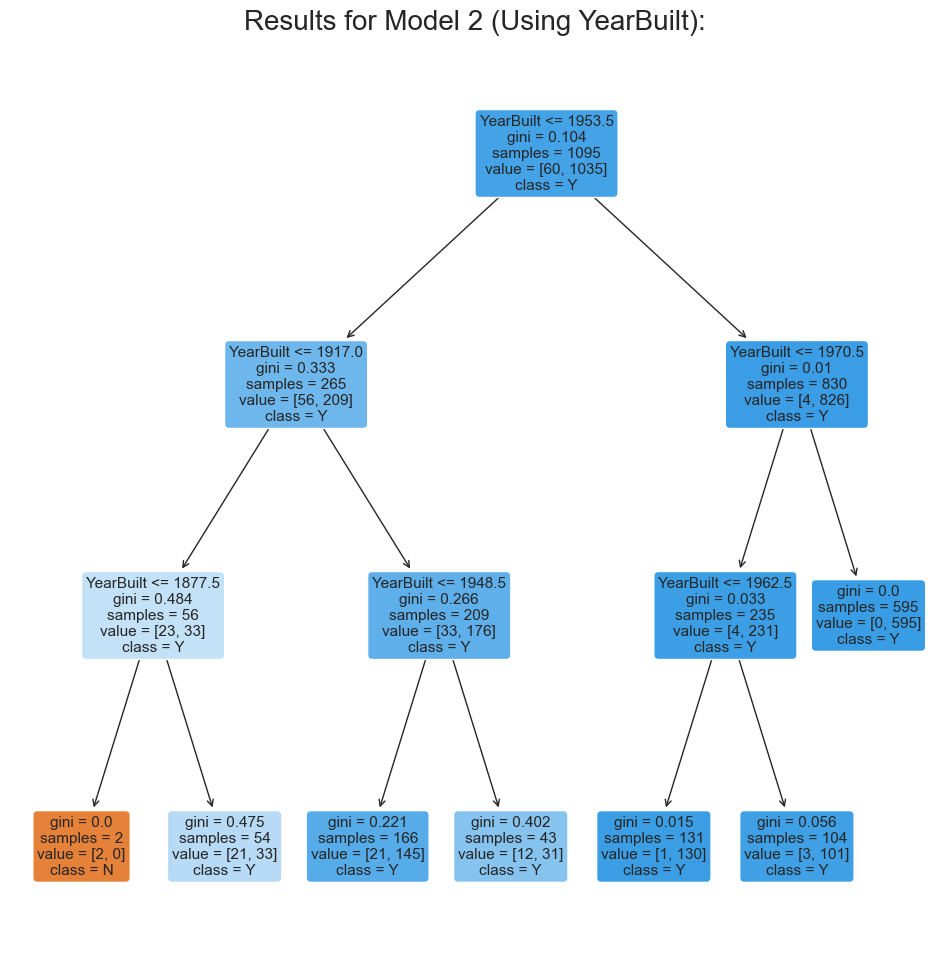

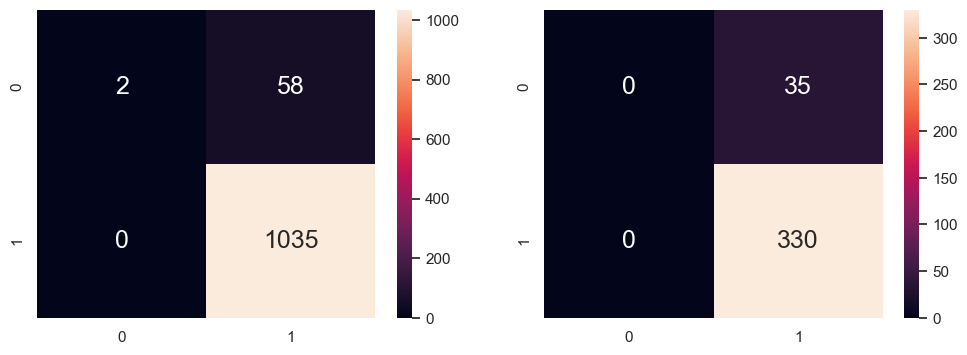

In [167]:
# Decision Tree using Train Data
dectree3 = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree3.fit(train_year, train_air)   

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=["YearBuilt"], 
          class_names=["N","Y"])

# Predict Legendary corresponding to Total Train
air_train_pred = dectree3.predict(train_year)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree3.score(train_year, train_air))

# Predict Legendary corresponding to Total Train
air_test_pred = dectree3.predict(test_year)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree3.score(test_year, test_air))
print()

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.title("Results for Model 2 (Using YearBuilt):", fontsize=20)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(train_air, air_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(test_air, air_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

print("Train:")
matrix=confusion_matrix(train_air, air_train_pred)
print("True positive Rate=",matrix[1][1]/(matrix[1][0]+matrix[1][1]))
print("False positive Rate=",matrix[0][1]/(matrix[0][0]+matrix[0][1]))
print()
print("Test:")
matrix_test=confusion_matrix(test_air, air_test_pred)
print("True positive Rate=",matrix_test[1][1]/(matrix_test[1][0]+matrix_test[1][1]))
print("False positive Rate=",matrix_test[0][1]/(matrix_test[0][0]+matrix_test[0][1]))

<h2>Problem 2) solution<h2>

<h3>Conclusion:
Based on the results, OverallQual appears to be the better predictor for CentralAir compared to both YearBuilt and SalesPrice. The OverallQual model achieves a lower false positive rate while maintaining high accuracy and goodness of fit on both the train and test datasets.<h3>

<h1>Problem 3a)<h1>

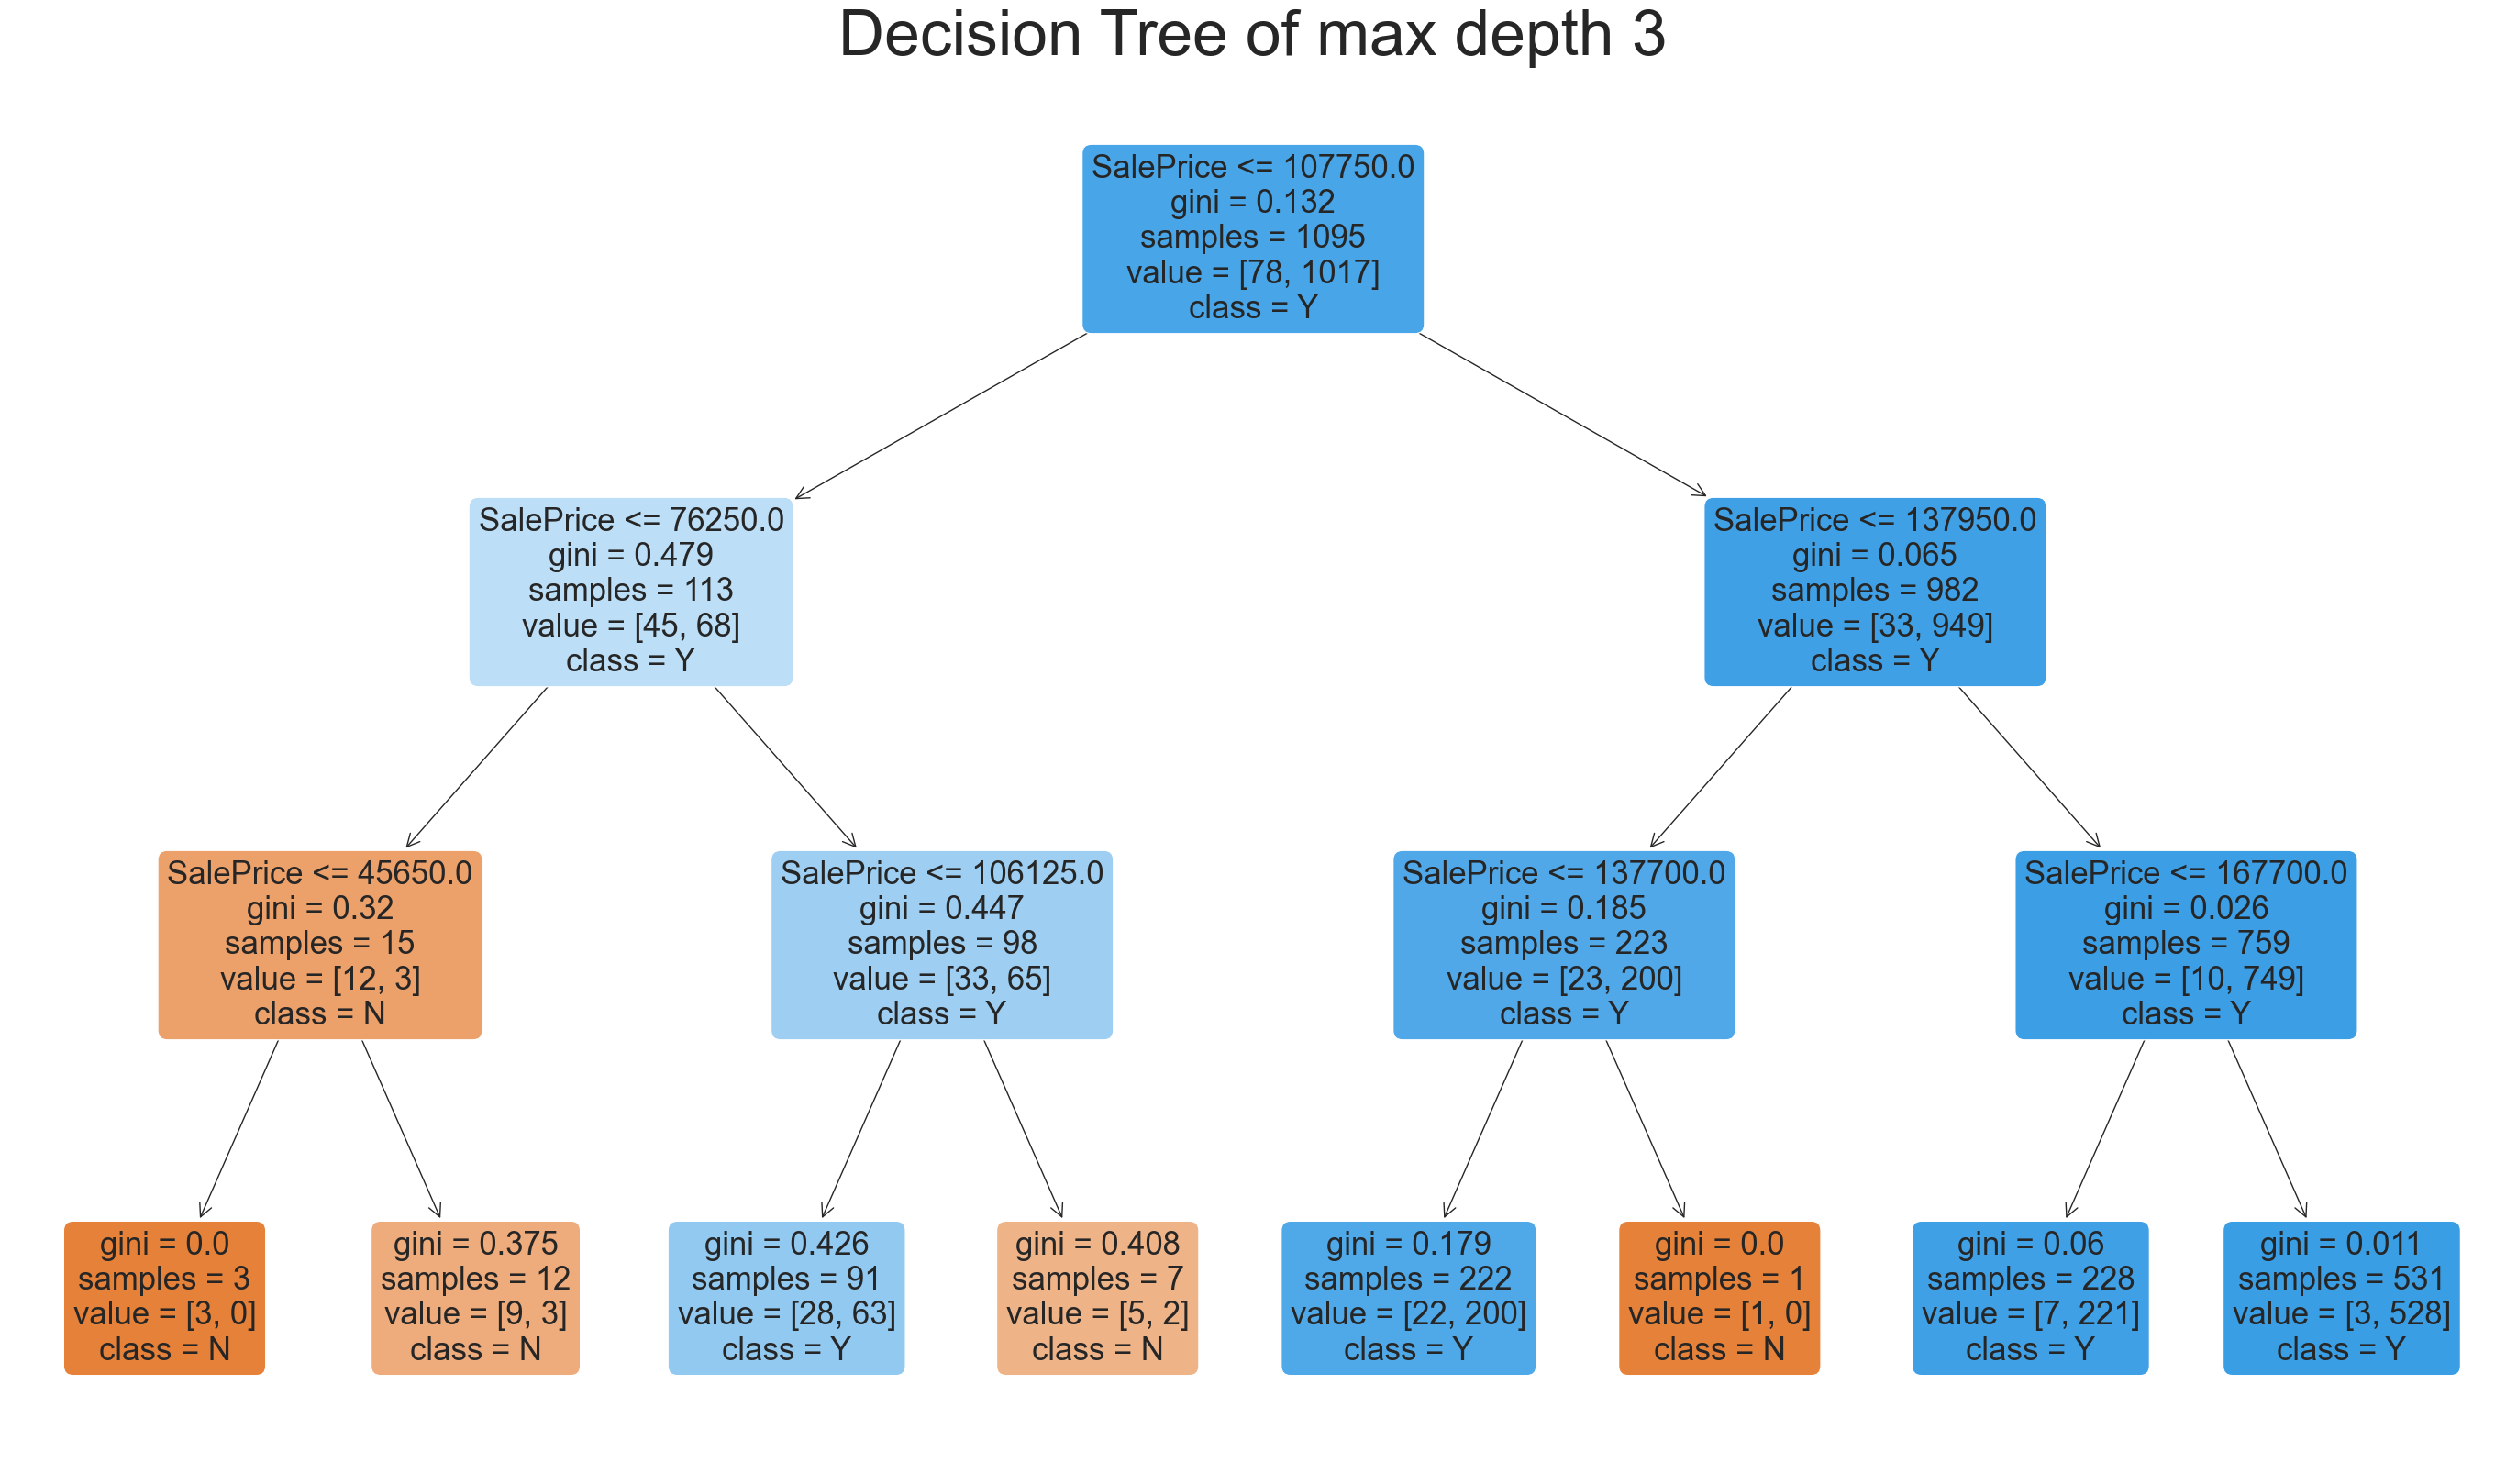

In [168]:
#from 1a
salePrice_df = pd.DataFrame(MainData['SalePrice'])     # Predictor
centralAir_df = pd.DataFrame(MainData['CentralAir'])   # Response

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(salePrice_df, centralAir_df, test_size=0.25, random_state=42)

# Decision Tree of max depth 3, Train Data
dectree3 = DecisionTreeClassifier(max_depth=3) 
dectree3.fit(X_train, y_train)                  

# Plot the trained Decision Tree of max depth 3 with larger node sizes
plt.figure(figsize=(35, 20))  
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"],
          fontsize=25)  
plt.title("Decision Tree of max depth 3", fontsize=50)
plt.show()

In [169]:
# Get the leaf node with the highest number of false positives (FP) in the training dataset
def find_node_with_highest_fp(tree, X_train, y_train):
    # Get the indices of the samples in the training set
    train_indices = list(range(len(X_train)))
    
    # Traverse the decision tree to find leaf nodes
    leave_id = tree.apply(X_train)
    
    # Initialize variables to keep track of the node with the highest FP and its FP count
    highest_fp_node = None
    highest_fp_count = 0
    
    # Iterate over each unique leaf node
    for node in np.unique(leave_id):
        # Get the samples in the training set that belong to this leaf node
        samples_in_node = [train_indices[i] for i in range(len(train_indices)) if leave_id[i] == node]
        
        # Count the number of false positives in this leaf node
        fp_count = np.sum(y_train.iloc[samples_in_node].values == 'N')
        
        # Update the highest FP node and count if applicable
        if fp_count > highest_fp_count:
            highest_fp_node = node
            highest_fp_count = fp_count
    
    return highest_fp_node, highest_fp_count

# Find the leaf node with the highest number of false positives
highest_fp_node, highest_fp_count = find_node_with_highest_fp(dectree3a, train_price, train_air)

# Print the leaf node with the highest number of false positives and its count
print("Leaf Node with the Highest False Positives (FP) in Training Data:")
print("Leaf Node ID:", highest_fp_node)
print("Number of False Positives (FP):", highest_fp_count)

# Get the samples in the training set that belong to this leaf node
samples_in_highest_fp_node = train_price[dectree3a.apply(train_price) == highest_fp_node]

# Get the indices of the samples in the training set that belong to the leaf node with the highest false positives
indices_in_highest_fp_node = train_price.index[dectree3a.apply(train_price) == highest_fp_node]

# Print the samples in the training set that belong to this leaf node with only 'SalePrice' column
print("Samples in Train set that end up in the Leaf Node with the Highest False Positives (FP):")
print(MainData.loc[indices_in_highest_fp_node, ['SalePrice']])

# Set display options to show all rows
pd.set_option('display.max_rows', None)

Leaf Node with the Highest False Positives (FP) in Training Data:
Leaf Node ID: 14
Number of False Positives (FP): 27
Samples in Train set that end up in the Leaf Node with the Highest False Positives (FP):
      SalePrice
1023     191000
810      181000
370      172400
534      178000
1174     239000
109      190000
100      205000
1190     168000
266      185000
1290     180500
506      215000
377      340000
618      314813
527      446261
355      177500
1195     176000
661      402000
1189     189000
621      240000
1157     230000
1322     190000
704      213000
199      274900
664      423000
1058     335000
1187     262000
147      222500
764      270000
282      207500
298      175000
918      238000
819      224000
573      170000
1454     185000
549      263000
845      171000
650      205950
798      485000
135      174000
762      215200
932      320000
435      212000
629      168500
1210     189000
1084     187500
158      254900
497      184000
1031     197000
1311     

<h2>Problem 3a) solutions:<h2>
        <h3>1. **Leaf Node Identification:** The leaf node with the highest number of False Positives (FP) in the training dataset is identified as Node 6.

    2. **False Positive Count:** This leaf node has a total of 28 False Positives.

    3. **Samples in the Leaf Node:** The list of samples from the training set that end up in this leaf node during the model fitting process is provided. These samples represent instances where the model predicted a positive outcome (presence of CentralAir) but the actual outcome was negative<h3>

<h1>Problem 3b)<h1>

In [170]:
# Filter the DataFrame to only include False Positive cases
false_positives = MainData.loc[indices_in_highest_fp_node]
false_positives = false_positives[false_positives['CentralAir'] == 'N']

# Print only the 'SalePrice' column of the False Positive cases
print("False Positive cases in the samples:")
print(false_positives['SalePrice'])

False Positive cases in the samples:
328    214500
417    239000
747    265979
Name: SalePrice, dtype: int64


<h2>Problem 3b) solution:<h2>
    <h3>Wide Range of Sale Prices: The SalePrice values of the properties classified as False Positives vary widely. This indicates that SalePrice alone may not be a strong predictor of the presence of CentralAir. Other factors or combinations of factors might contribute to the presence or absence of CentralAir in a property.<h3>